In [17]:
import pandas as pd
import matplotlib.pyplot as plt
reviews = pd.read_csv("pew_research.csv")
reviews.head()
print(reviews.head())

      QRID    weight  SurveyPublic  DEMONYM  Q1  Q2a  Q2b  Q2c  Q2d  Q3  ...  \
0  1300002  0.469825             1        1   1    3    3    3    3   2  ...   
1  1300003  0.546789             1        1   3    1    2    1    3   2  ...   
2  1300049  0.703324             1        1   2    1    3    1    3   2  ...   
3  1300057  0.844956             1        1   1    3    3    3    3   2  ...   
4  1300065  0.552330             1        1   3    3    3    3    3   2  ...   

   QZIPHKG  QZIPHKG2 QZIPJPN2 QZIPKOR QZIPTWN VietnamRegion  GenderRec  \
0       17         3                                                 2   
1       17         3                                                 2   
2       10         3                                                 1   
3        3         1                                                 1   
4        3         1                                                 2   

   Language  ISCED UrbanVietnam  
0         1      5               
1     

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13836\1700702078.py:3: DtypeWarning: Columns (12,13,14,15,101,104,110,111,112,113,114) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv("pew_research.csv")


Q24: Ancestors did something

In [18]:
#Extracting required data
q24_columns = ['Q24a', 'Q24b', 'Q24c', 'Q24d']
q24_data = reviews[q24_columns]
print(q24_data.head())

   Q24a  Q24b  Q24c  Q24d
0     2     2     2     2
1     2     2     2     2
2     1     2     2     2
3     2     2     2     2
4     1     2     1     2


In [19]:
#cleaning data
q24_data.replace([98, 99], None, inplace=True)
q24_data = q24_data.apply(pd.to_numeric)
print(q24_data)

       Q24a  Q24b  Q24c  Q24d
0       2.0   2.0   2.0   2.0
1       2.0   2.0   2.0   2.0
2       1.0   2.0   2.0   2.0
3       2.0   2.0   2.0   2.0
4       1.0   2.0   1.0   2.0
...     ...   ...   ...   ...
10385   1.0   2.0   2.0   1.0
10386   1.0   2.0   1.0   1.0
10387   2.0   2.0   2.0   2.0
10388   NaN   NaN   1.0   2.0
10389   2.0   2.0   2.0   2.0

[10390 rows x 4 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13836\1640587615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q24_data.replace([98, 99], None, inplace=True)


In [20]:
#Analyze data/ Count frequency for each response
for col in q24_columns:
    print(f"Results for {col}:")
    print(q24_data[col].value_counts()) # yes is 1 and No is 2

Results for Q24a:
Q24a
2.0    5858
1.0    4235
Name: count, dtype: int64
Results for Q24b:
Q24b
2.0    9282
1.0     862
Name: count, dtype: int64
Results for Q24c:
Q24c
2.0    7471
1.0    2854
Name: count, dtype: int64
Results for Q24d:
Q24d
2.0    8567
1.0    1617
Name: count, dtype: int64


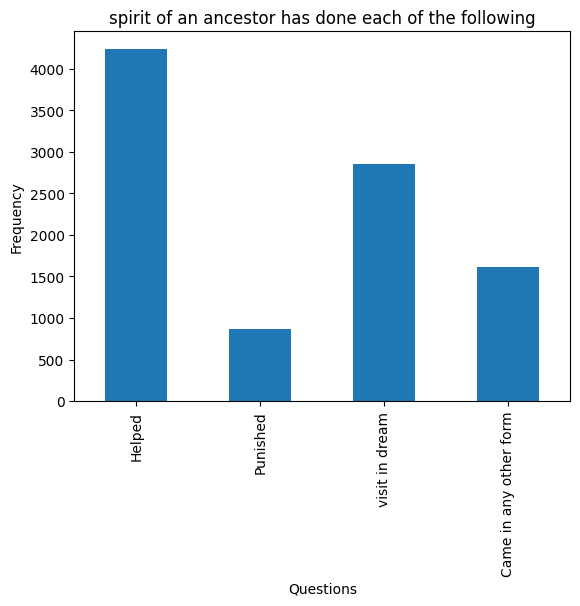

In [52]:
# visualize data
q24_labels = {
    'Q24a': 'Helped',
    'Q24b': 'Punished',
    'Q24c': 'visit in dream',
    'Q24d': 'Came in any other form'
    }

q24_data.eq(1).sum().rename(index=q24_labels).plot(kind='bar', title='spirit of an ancestor has done each of the following')
plt.xlabel('Questions')
plt.ylabel('Frequency')
plt.show()

Q11: unseen beings in the world

In [22]:
#Extracting required data
q11_columns = ['Q11', 'Q10'] #q10 is about belief in existence of god
q11_data = reviews[q11_columns]
print(q11_data.head())

   Q11  Q10
0    1    2
1    1    1
2    2    2
3    1    1
4    1    1


In [23]:
#cleaning data
q11_data.replace([98, 99], None, inplace=True)
q11_yes_count = (q11_data['Q11'] == 1).sum()
q11_no_count = (q11_data['Q11'] == 2).sum()
print(f"Q11 - Belief in unseen beings: Yes={q11_yes_count}, No={q11_no_count}")

Q11 - Belief in unseen beings: Yes=6715, No=3422


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13836\473169011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q11_data.replace([98, 99], None, inplace=True)


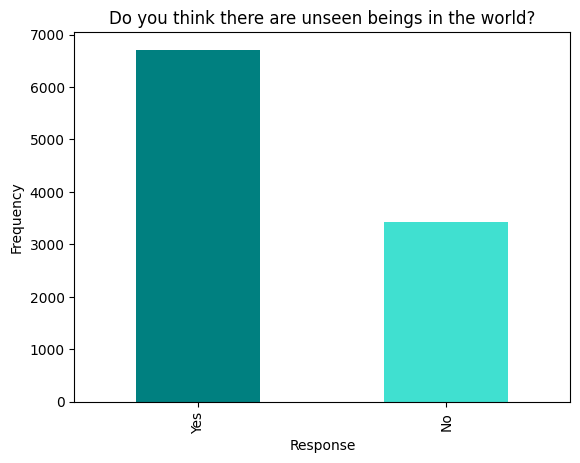

In [24]:
# visualize data
q11_counts = pd.Series(
    {'Yes': q11_yes_count, 'No': q11_no_count}
)

q11_counts.plot(kind='bar', title='Do you think there are unseen beings in the world?', color=['teal', 'turquoise'])
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.show()

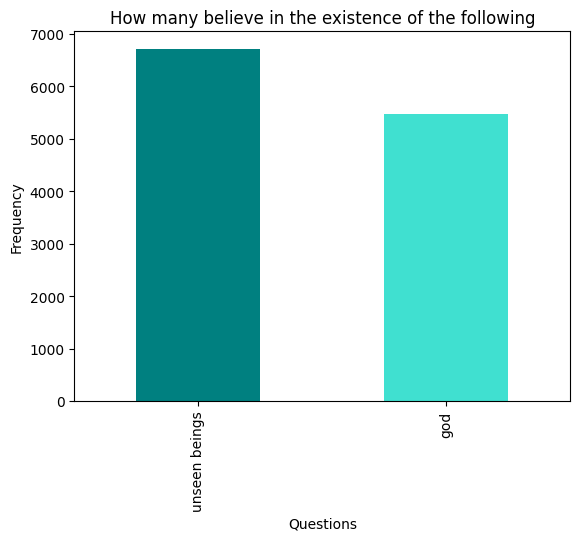

In [32]:
#compaeidon betweenn q10 and q11
q11_labels = {
    'Q11': 'unseen beings',
    'Q10': 'god',
    }

q11_data.eq(1).sum().rename(index=q11_labels).plot(kind='bar', title='How many believe in the existence of the following', color=['teal', 'turquoise'])
#q11_data.sum().rename(index=q11_labels).plot(kind='bar', title='How many believe in the existence of :', color=['teal', 'turquoise'])
plt.xlabel('Questions')
plt.ylabel('Frequency')
plt.show()

Q25: Do things have their own spirits

In [33]:
#Extracting required data
q25_columns = ['Q25a', 'Q25b', 'Q25c']
q25_data = reviews[q25_columns]
print(q25_data.head())

   Q25a  Q25b  Q25c
0     1     2     2
1     1     1     1
2     2     2     2
3     2     2     2
4     2     1     2


In [34]:
#cleaning data
q25_data.replace([98, 99], None, inplace=True)
q25_data = q25_data.apply(pd.to_numeric)
print(q25_data)

       Q25a  Q25b  Q25c
0       1.0   2.0   2.0
1       1.0   1.0   1.0
2       2.0   2.0   2.0
3       2.0   2.0   2.0
4       2.0   1.0   2.0
...     ...   ...   ...
10385   2.0   2.0   2.0
10386   1.0   2.0   1.0
10387   2.0   2.0   2.0
10388   1.0   2.0   2.0
10389   2.0   2.0   2.0

[10390 rows x 3 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13836\2134822537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q25_data.replace([98, 99], None, inplace=True)


In [35]:
#Analyze data
for col in q25_columns:
    print(f"Results for {col}:")
    print(q25_data[col].value_counts()) # yes is 1 and No is 2

Results for Q25a:
Q25a
2.0    5703
1.0    4409
Name: count, dtype: int64
Results for Q25b:
Q25b
2.0    7993
1.0    2071
Name: count, dtype: int64
Results for Q25c:
Q25c
2.0    7762
1.0    2357
Name: count, dtype: int64


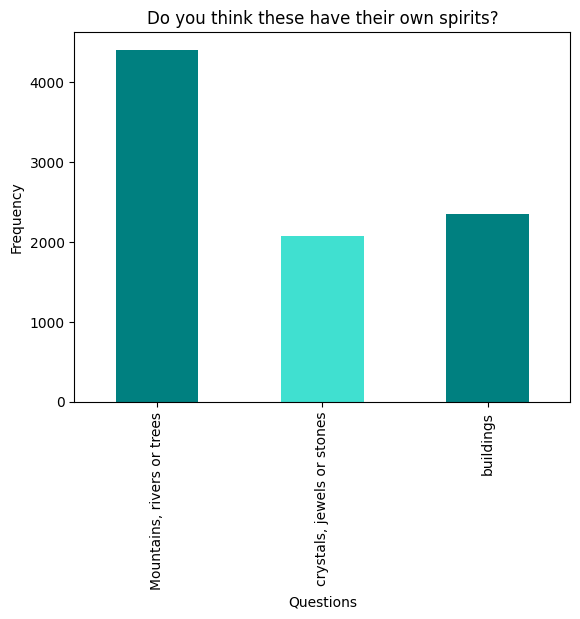

In [37]:
# visualize data
q25_labels = {
    'Q25a': 'Mountains, rivers or trees',
    'Q25b': 'crystals, jewels or stones',
    'Q25c': 'buildings'
    }

q25_data.eq(1).sum().rename(index=q25_labels).plot(kind='bar', title='Do you think these have their own spirits?', color=['teal', 'turquoise'])
plt.xlabel('Questions')
plt.ylabel('Frequency')
plt.show()

Q27: Do you think each of the following things exist

In [38]:
#Extracting required data
q27_columns = ['Q27a', 'Q27b', 'Q27c', 'Q27d', 'Q27e', 'Q27f', 'Q27g', 'Q27h', 'Q27i']
q27_data = reviews[q27_columns]
print(q27_data.head())

   Q27a  Q27b  Q27c  Q27d  Q27e  Q27f  Q27g  Q27h  Q27i
0     1     1     1     2     1     1     2     2     1
1     1     1     1     1     1     1     1     1     1
2     2     2     1     2     2     2     2     2     2
3     1     1     1     1     1     1     1     1     1
4     1     1     1     1     1     1     1     1     1


In [39]:
#cleaning data
q27_data.replace([98, 99], None, inplace=True)
q27_data = q27_data.apply(pd.to_numeric)
print(q27_data)

       Q27a  Q27b  Q27c  Q27d  Q27e  Q27f  Q27g  Q27h  Q27i
0       1.0   1.0   1.0   2.0   1.0   1.0   2.0   2.0   1.0
1       1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
2       2.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   2.0
3       1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
4       1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
...     ...   ...   ...   ...   ...   ...   ...   ...   ...
10385   1.0   1.0   NaN   NaN   NaN   1.0   1.0   1.0   1.0
10386   1.0   2.0   2.0   1.0   2.0   1.0   2.0   2.0   2.0
10387   2.0   1.0   1.0   2.0   2.0   1.0   1.0   1.0   2.0
10388   2.0   1.0   NaN   2.0   1.0   2.0   1.0   2.0   2.0
10389   2.0   1.0   NaN   2.0   2.0   2.0   2.0   2.0   2.0

[10390 rows x 9 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13836\3755455887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q27_data.replace([98, 99], None, inplace=True)


In [41]:
#Analyze data
for col in q27_columns:
    print(f"Results for {col}:")
    print(q27_data[col].value_counts()) # yes is 1 and No is 2

Results for Q27a:
Q27a
1.0    5156
2.0    4764
Name: count, dtype: int64
Results for Q27b:
Q27b
1.0    7510
2.0    2631
Name: count, dtype: int64
Results for Q27c:
Q27c
1.0    6480
2.0    3221
Name: count, dtype: int64
Results for Q27d:
Q27d
2.0    5274
1.0    3412
Name: count, dtype: int64
Results for Q27e:
Q27e
1.0    5504
2.0    4484
Name: count, dtype: int64
Results for Q27f:
Q27f
1.0    4990
2.0    4981
Name: count, dtype: int64
Results for Q27g:
Q27g
1.0    6704
2.0    3407
Name: count, dtype: int64
Results for Q27h:
Q27h
1.0    5451
2.0    4397
Name: count, dtype: int64
Results for Q27i:
Q27i
1.0    5362
2.0    4524
Name: count, dtype: int64


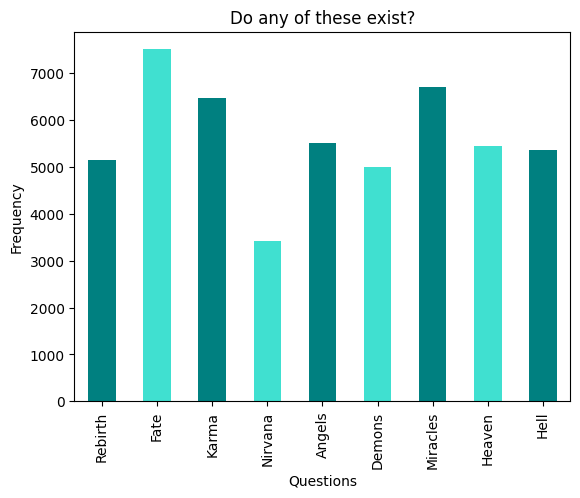

In [44]:
# visualize data
q27_labels = {
    'Q27a': 'Rebirth',
    'Q27b': 'Fate',
    'Q27c': 'Karma',
    'Q27d': 'Nirvana',
    'Q27e': 'Angels',
    'Q27f': 'Demons',
    'Q27g': 'Miracles',
    'Q27h': 'Heaven',
    'Q27i': 'Hell',
    }

q27_data.eq(1).sum().rename(index=q27_labels).plot(kind='bar', title='Do any of these exist?', color=['teal', 'turquoise'])
plt.xlabel('Questions')
plt.ylabel('Frequency')
plt.show()

COMBINING RESULTS FROM ALL QUESTIONS TO CHECK THE NO. OF PEOPLE WHO BELIEVE IN THE EXISTENCE OF HEAVENLY BODIES

In [45]:
belief_heavenly = (
    (q11_data['Q11'] == 1) |  # "Yes" for Q11
    (q24_data == 1).any(axis=1) |  # "Yes" for any option in Q24
    (q25_data == 1).any(axis=1) |  # "Yes" for any option in Q25
    (q27_data == 1).any(axis=1)    # "Yes" for any option in Q27
)

reviews['Belief_Heavenly'] = belief_heavenly

In [46]:
total_believers = belief_heavenly.sum()
print("Total number of people who believe in heavenly bodies:", total_believers)

Total number of people who believe in heavenly bodies: 9619


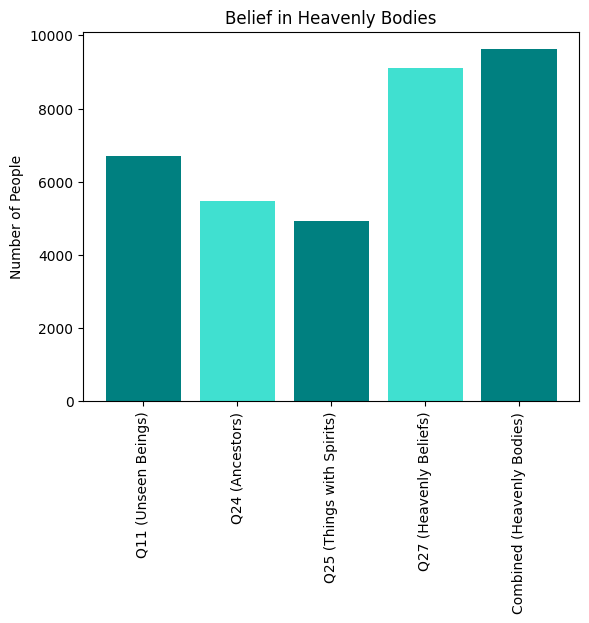

In [ ]:
= {
    'Q11 (Unseen Beings)': (q11_data['Q11'] == 1).sum(),
    'Q24 (Ancestors)': (q24_data == 1).any(axis=1).sum(),
    'Q25 (Things with Spirits)': (q25_data == 1).any(axis=1).sum(),
    'Q27 (Heavenly Beliefs)': (q27_data == 1).any(axis=1).sum(),
    'Combined (Heavenly Bodies)': total_believers
}

plt.bar(belief_counts.keys(), belief_counts.values(), color=['teal', 'turquoise'])
plt.title('Belief in Heavenly Bodies')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.show()



In [50]:
labels = belief_counts.keys()
sizes = belief_counts.values()
colors = ['teal', 'turquoise', 'azure', 'cyan', 'blue']

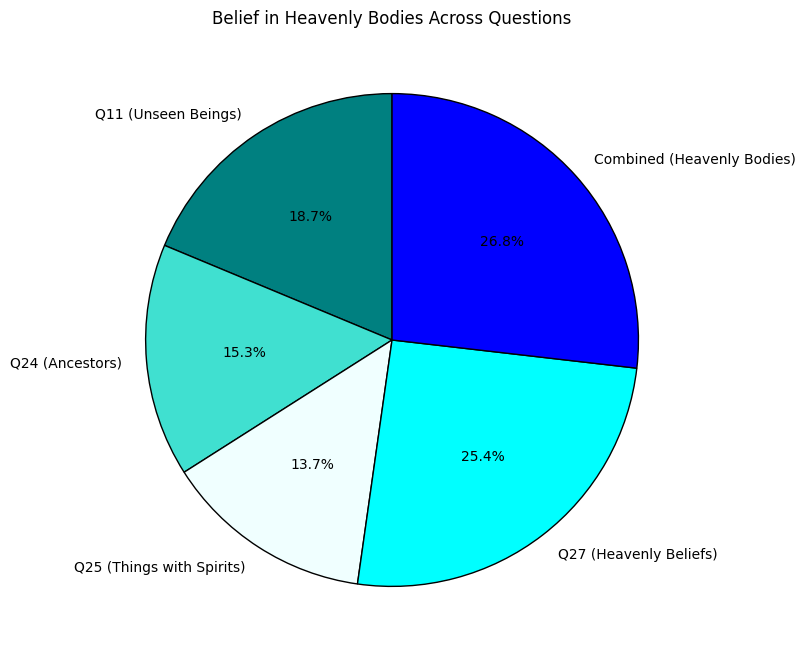

In [51]:
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Belief in Heavenly Bodies Across Questions')
plt.show()